In [1]:
# -*- coding:utf-8 -*-
# !/usr/bin/python
# Author: Selvaria
# mnist exercise

import pandas

df_data = pandas.read_csv(r'D:\data\Kaggle\MNIST\train.csv')
df_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
#样本形状
#df_test = pandas.read_csv(r'D:\data\Kaggle\MNIST\test.csv')

train_samples= df_data.drop(df_data.columns[0,], axis=1).values
train_samples.shape

(42000, 784)

(28, 28)


<function matplotlib.pyplot.show>

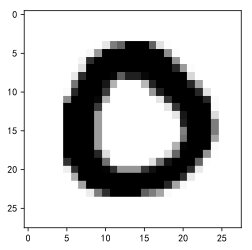

In [4]:
train_single = train_samples.reshape(train_samples.shape[0], 28, 28)
num_single = train_single[4]
print(num_single.shape)

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' #画的图更清晰

plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False  # 步骤二（解决坐标轴负数的负号显示问题）
plt.imshow(num_single, cmap=plt.cm.binary)
plt.show

In [6]:
df_test = pandas.read_csv(r'D:\data\Kaggle\MNIST\test.csv')
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#划分训练集，验证集，测试集
train = df_data.drop(df_data.columns[0,], axis=1)[:30000].values
train_labels = df_data['label'][:30000].values
validation = df_data.drop(df_data.columns[0,], axis=1)[30000:40000].values
vali_labels = df_data['label'][30000:40000].values
test = df_data.drop(df_test.columns[0,], axis=1)[40000:].values
test_labels = df_data['label'][40000:].values

print(train_labels)
print(train.shape)
print(validation.shape)
print(test.shape)

[1 0 1 ... 2 3 0]
(30000, 784)
(10000, 784)
(2000, 784)


In [8]:
#归一化
train = train.astype('float32')/255
validation = validation.astype('float32')/255
test = test.astype('float32')/255

In [ ]:
#使用全连接层，最高值在97.5%左右
from keras.models import Sequential 
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(784,)))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu', input_shape=(784,)))
#model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train,
    train_labels,
    epochs=10, 
    batch_size=64, 
    validation_data=(validation,vali_labels)
)

In [ ]:
train_data_cross = df_data.drop(df_train.columns[0,], axis=1)[:40000].values
train_cross_labels = df_data['label'][:40000].values

train_cross = train_data_cross.astype('float32')/255

model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(784,)))
#model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_cross,
    train_cross_labels,
    epochs=10, 
    batch_size=128, 
    validation_split=0.1
)

In [10]:
#cnn
#Conv1D，可能是方法不对，只能在40%左右

from keras import preprocessing

train_c1 = df_data.drop(df_data.columns[0,], axis=1)[:40000].values/255
test_c1 = df_data.drop(df_data.columns[0,], axis=1)[40000:].values/255
train_labels_c1 = df_data['label'][:40000].values
test_labels_c1 = df_data['label'][40000:].values

#x_train = preprocessing.sequence.pad_sequences(train_c1, maxlen=max_len)/255
#x_test = preprocessing.sequence.pad_sequences(test_c1, maxlen=max_len)/255

print(train_c1.shape)
print(train_labels_c1)

(40000, 784)
[1 0 1 ... 0 0 3]


In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_c1,
    train_labels_c1,
    epochs=10, 
    batch_size=128
)

result = model.evaluate(test_c1, test_labels_c1)
result

In [30]:
#使用cnn
#Conv2D 准确率能达到99%以上

import numpy as np
np.random.seed(1337)
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import RMSprop #优化器采用RMSprop，加速神经网络训练方法

train_c2 = df_data.drop(df_data.columns[0,], axis=1)[:40000].values
test_c2 = df_data.drop(df_data.columns[0,], axis=1)[40000:].values
train_labels_c2 = df_data['label'][:40000].values
test_labels_c2 = df_data['label'][40000:].values

X_train = train_c2.reshape(train_c2.shape[0], 28, 28, 1)
X_test = test_c2.reshape(test_c2.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

y_train = np_utils.to_categorical(train_labels_c2, 10)
y_test = np_utils.to_categorical(test_labels_c2, 10)

model = Sequential()

#卷积层Convolutional
model.add(Conv2D(
    filters=32, #从原来的的1张图生成32张图
    kernel_size=(5,5), #filter的宽和
    padding = 'same', #padding method
    input_shape=(28,28,1), #1是高度（黑白是1，彩色是3），后面是高和宽 
    activation ='relu'
))


#取样层pooling
model.add(MaxPooling2D(
    pool_size=(2,2),#
    strides=(2,2), #取样跳过的像素长度
    padding='same'
))

#第2个卷积层Convolutional
model.add(Conv2D(64,(5,5),padding='same',activation ='relu'))

#第2个取样层pooling
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.25))

#全连接层
model.add(Flatten()) #将三维的层抹平成一维的层
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
#第二个连接层
model.add(Dense(10, activation='softmax'))

#Compile model.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#train
print('\nNow training...')
model.fit(X_train, y_train, epochs=10, batch_size=64) 

#test
print('\nNow testing...')
loss, accuracy = model.evaluate(X_test, y_test) 

print('Now test loss:', loss)
print('Now test accuracy:',accuracy)


Now training...
Epoch 1/10
40000/40000 [==============================] - 46s 1ms/step - loss: 0.2124 - acc: 0.9322
Epoch 2/10
40000/40000 [==============================] - 47s 1ms/step - loss: 0.0696 - acc: 0.9782
Epoch 3/10
40000/40000 [==============================] - 48s 1ms/step - loss: 0.0520 - acc: 0.9845
Epoch 4/10
40000/40000 [==============================] - 48s 1ms/step - loss: 0.0423 - acc: 0.9875
Epoch 5/10
40000/40000 [==============================] - 47s 1ms/step - loss: 0.0346 - acc: 0.9890
Epoch 6/10
40000/40000 [==============================] - 45s 1ms/step - loss: 0.0295 - acc: 0.9906
Epoch 7/10
40000/40000 [==============================] - 46s 1ms/step - loss: 0.0273 - acc: 0.9911
Epoch 8/10
40000/40000 [==============================] - 47s 1ms/step - loss: 0.0235 - acc: 0.9927
Epoch 9/10
40000/40000 [==============================] - 47s 1ms/step - loss: 0.0216 - acc: 0.9926
Epoch 10/10
40000/40000 [==============================] - 47s 1ms/step - loss: 0.0

In [14]:
#构建使用了数据增强的训练集和测试集，基于数据源的array数组，准确率在99.19%

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1/255, #对图片的每个像素值均乘上这个放缩因子，把像素值放缩到0和1之间有利于模型的收敛
    rotation_range = 40, #角度值，0-180.表示图像随机旋转的角度范围
    width_shift_range = 0.1, #平移比例，下同
    height_shift_range = 0.1,
    shear_range = 0.1, #随机错切变换角度
    zoom_range = 0.1, #随机缩放比例
    #horizontal_flip = True, #随机将一半图像水平翻转，主要用于真实世界的图像（即没有水平不对称的假设前提下）
    featurewise_center = True, #白化处理，只适用于mnist这种只有1条通道的黑白图像，但是本次是传入numpy图像，用不到
    fill_mode='nearest' #填充新创建像素的方法
)

test_datagen = ImageDataGenerator(rescale=1/255) #注意验证集的数据不能增强

train_advance = df_data.drop(df_data.columns[0,], axis=1)[:40000].values
test_advance = df_data.drop(df_data.columns[0,], axis=1)[40000:].values
train_labels_ad = df_data['label'][:40000].values
test_labels_ad = df_data['label'][40000:].values

X_train = train_advance.reshape(train_advance.shape[0], 28, 28, 1)
X_test = test_advance.reshape(test_advance.shape[0], 28, 28, 1)
#X_train = X_train.astype('float32')/255
#X_test = X_test.astype('float32')/255

train_generator = train_datagen.flow(
    x = X_train,
    y = train_labels_ad,
    batch_size = 200 #每批量样本大小
    #class_mode = 'categorical' #因为使用了categorical_crossentropy损失函数，所以用二进制标签
)

test_generator = test_datagen.flow(
    x = X_test, 
    y = test_labels_ad,
    batch_size = 20
    #class_mode = 'categorical' 
)

In [4]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras import models

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'same',activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same', activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [15]:
from keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau

optimizer = RMSprop(lr=0.001, epsilon=1e-08)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch = 200, #40000/200
    epochs = 30, #增加了训练批次
    validation_data = test_generator, 
    callbacks=[learning_rate_reduction],
    validation_steps = 100 #2000/20
)

Epoch 1/30


D:\Selvaria\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


200/200 [==============================] - 109s 547ms/step - loss: 0.0985 - acc: 0.9714 - val_loss: 0.0447 - val_acc: 0.9885
Epoch 2/30
200/200 [==============================] - 114s 571ms/step - loss: 0.0873 - acc: 0.9744 - val_loss: 0.0405 - val_acc: 0.9860
Epoch 3/30
200/200 [==============================] - 110s 548ms/step - loss: 0.0808 - acc: 0.9762 - val_loss: 0.0474 - val_acc: 0.9845
Epoch 4/30
200/200 [==============================] - 111s 553ms/step - loss: 0.0848 - acc: 0.9755 - val_loss: 0.0401 - val_acc: 0.9885

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 5/30
200/200 [==============================] - 112s 558ms/step - loss: 0.0630 - acc: 0.9810 - val_loss: 0.0389 - val_acc: 0.9875
Epoch 6/30
200/200 [==============================] - 114s 570ms/step - loss: 0.0640 - acc: 0.9817 - val_loss: 0.0454 - val_acc: 0.9880
Epoch 7/30
200/200 [==============================] - 112s 561ms/step - loss: 0.0618 - acc: 0.9824 - val_loss: 0.0

In [16]:
print(model.evaluate_generator(test_generator, steps = 100))

[0.03311536323648397, 0.9919999980926514]


In [19]:
model.save('minist_9919.h5')

In [17]:
df_submit = pandas.read_csv(r'D:\data\Kaggle\MNIST\test.csv')
data_submit = df_submit.values
data_input = data_submit.reshape(data_submit.shape[0], 28, 28, 1)/255
print(data_input.shape)

(28000, 28, 28, 1)


In [18]:
import numpy as np

prediction = model.predict(data_input)
result = np.argmax(prediction[0])
result

2

In [20]:
df_submit = pandas.read_csv(r'D:\data\Kaggle\MNIST\sample_submission.csv')
for i in range(len(prediction)):
    result_label = np.argmax(prediction[i])
    df_submit.loc[i, 'Label'] = result_label

df_submit.to_csv(r'D:\data\Kaggle\MNIST\mnist_submission_enhanced.csv', index=False)